## Линейные сплайны

$\textbf{Линейный сплайн}$ (дефекта 1), интерполирующий $f(x)$ на $[a, b]$: $$c(x) := b_k + a_k (x-x_k),$$ 

где $x\in [x_{k-1}, x_{k}] \big|_{k=1}^n$

$\textbf{Обозначение линейного сплайна дефекта 1}$: $S^n_{1,0}$, где $n, 1, 0$ - кол-во узлов интерполирования, старшая степень и порядок гладкости сплайна соответственно.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
np.set_printoptions(suppress=True) # чтобы оч маленькие значения печатались в виде нулей

In [2]:
# Исходная функция
def fn(x):
    return x**2 + 4*np.sin(x) - 2 

## По $m$ равноотстоящим узлам

In [3]:
def lin_spline(arg, a, b, m, fig=None):
    x = np.linspace(a, b, m)
    # n - число линейных сплайнов
    n = m - 1

    # AB = C
    A = np.zeros((2*n, 2*n))
    C = np.zeros(2*n)

    for i in range(n):
        A[i, i] = x[i]
        A[i, n+i] = 1

        # Строки [n, 2n-1]
        A[n+i, i] = x[i+1]
        A[n+i, n+i] = 1

        C[i] = fn(x[i])
        C[n+i] = fn(x[i+1])

    # В последней строке задаем a_1 = 1    
    A[2*n-1, 0] = 1

    # Решаем относительно b
    B = np.linalg.solve(A,C)
    ai = B[:n]
    bi = B[n:2*n]
    
    # График     
    if fig == True:
        plt.figure()
        for k in range(n):
            xspline = np.linspace(x[k], x[k+1])
            yspline = ai[k]*xspline + bi[k]
            plt.plot(xspline, yspline, '-', linewidth=4)
        plt.xlabel('$x$')
        plt.ylabel('$y$')
        plt.title('$S_{1,0}^n$ по равноотстоящим узлам для $f(x)$')
        plt.show()
        
    # Вычисление значений    
    elif fig == None:
        flag, res = 0, 0
        eps = 10**(-6)
        for i in range(n):
            if arg == a:
                arg += eps
                flag = i
                res = ai[flag]*arg + bi[flag]
            elif arg == b:
                arg -= eps
                flag = i
                res = ai[flag]*arg + bi[flag]
            elif (arg > x[i]) and (arg < x[i+1]):
                flag = i
                res = ai[flag]*arg + bi[flag]
        return res

## Изобразим $S_{1,0}^m$

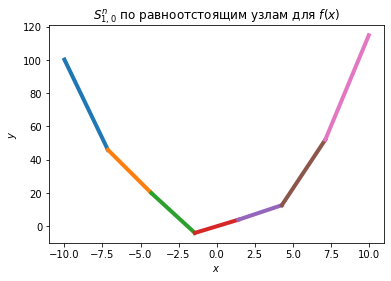

In [5]:
lin_spline(arg=10, a=-10, b=10, m=8, fig=True)

## Оптимальные узлы Чебышева $$x_i = 0.5 \left((b-a)\cos\dfrac{(2i+1)\pi}{2(n+1)} + (b+a)\right),\; i\in \overline{0,n}$$

In [6]:
def optimal_lin_spline(arg, a, b, m, fig=None):
    # оптимальные узлы Чебышева
    chebish = []
    for i in range(0, m):
        chebish.append(0.5 * ((b-a)*np.cos(((2*i+1)*np.pi)/(2*(m+1))) + (b+a)))

    # n - число линейных сплайнов
    n = m - 1

    # AB = C
    A_opt = np.zeros((2*n, 2*n))
    C_opt = np.zeros(2*n)

    for i in range(n):
        A_opt[i, i] = chebish[i]
        A_opt[i, n+i] = 1

        # Строки [n, 2n-1]
        A_opt[n+i, i] = chebish[i+1]
        A_opt[n+i, n+i] = 1

        C_opt[i] = fn(chebish[i])
        C_opt[n+i] = fn(chebish[i+1])

    # В последней строке задаем a_1 = 1    
    A_opt[2*n-1, 0] = 1

    # Решаем относительно b
    B_opt = np.linalg.solve(A_opt, C_opt)
    ai_opt = B_opt[:n]
    bi_opt = B_opt[n:2*n]
    
    # График     
    if fig == True:
        plt.figure()
        for k in range(n):
            xspline = np.linspace(chebish[k], chebish[k+1])
            yspline = ai_opt[k]*xspline + bi_opt[k]
            plt.plot(xspline, yspline, '-', linewidth=4)
        plt.xlabel('$x$')
        plt.ylabel('$y$')
        plt.title('$S_{1,0}^n$ по узлам Чебышева для $f(x)$')
        plt.show()
        
    # Вычисление значений    
    elif fig == None:
        flag, res = 0, 0
        eps = 10**(-6)
        for i in range(n):
            if arg == a:
                arg += eps
                flag = i
                res = ai_opt[flag]*arg + bi_opt[flag]
            elif arg == b:
                arg -= eps
                flag = i
                res = ai_opt[flag]*arg + bi_opt[flag]
            elif (arg < chebish[i]) and (arg > chebish[i+1]):
                flag = i
                res = ai_opt[flag]*arg + bi_opt[flag]
        return res

## Изобразим $S_{1,0}^{m_{opt}}$

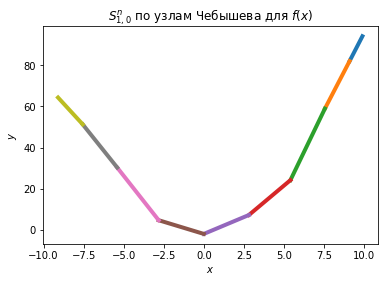

In [9]:
optimal_lin_spline(arg=10, a=-10, b=10, m=10, fig=True)

## Найдем максимальные отклонения $RS_{1,0}^n, RS_{1,0}^{n_{opt}}$

In [11]:
k = int(input('Введите количество k точек разбиения интервала интерполирования, в которых определяются отклонения: '))
max_nodes = int(input('Введите максимальное количество max_nodes узлов: '))
# mds = maximum_difference_segment
a = float(input('Введите a: '))
b = float(input('Введите b: '))
mds = np.linspace(a, b, k)

func_mds = []
spline_mds = []
optimal_spline_mds = []
RSn_mp = []
RSn_opt_mp = []

# значения точной функции в точках x0, x1, ..., xm; m >> n
for i in mds:
    func_mds.append(fn(i))
    
lin_spl_newt_deviations = []

print('Таблица 1:')
print('-----------------------------------------------------------------------------------------------------------')
print('| кол-во узлов, n | кол-во точек разбиения, k   | max RSn_mp \t\t | max RSn_opt_mp \t\t|' )
print('-----------------------------------------------------------------------------------------------------------')

for pp in range(3, max_nodes + 1):
    
    n = pp - 1
    xx = np.linspace(a, b, pp)
    
    # Ищем отклонения     

    for p in mds:
        # значения линейного сплайна S_{1,0}^n в точках x0, x1, ..., xk; k >> n   
        spline_mds.append(lin_spline(arg=p, a=a, b=b, m=pp))
        # значения линейного сплайна S_{1,0}^{n_opt} в точках x0, x1, ..., xk; k >> n        
        optimal_spline_mds.append(optimal_lin_spline(arg=p, a=a, b=b, m=pp))
            
    # отклонения
    for j in range(1, len(mds)):
        RSn_mp.append(np.absolute(func_mds[j] - spline_mds[j]))
        RSn_opt_mp.append(np.absolute(func_mds[j] - optimal_spline_mds[j]))
    RSn_mp_max = max(RSn_mp)
    RSn_opt_mp_max = max(RSn_opt_mp)
    
    print('|\t', pp, '\t|\t\t', k, '\t  |', RSn_mp_max, '\t|', RSn_opt_mp_max, '\t\t |')
    print('-----------------------------------------------------------------------------------------------------------')
    RSn_mp = []
    RSn_opt_mp = []
    RSn_mp_max, RSn_opt_mp_max = 0, 0
    spline_mds = []
    optimal_spline_mds = []
    ai_opt, bi_opt, ai, bi = [], [], [], []

Введите количество k точек разбиения интервала интерполирования, в которых определяются отклонения: 20
Введите максимальное количество max_nodes узлов: 50
Введите a: -10
Введите b: 10
Таблица 1:
-----------------------------------------------------------------------------------------------------------
| кол-во узлов, n | кол-во точек разбиения, k   | max RSn_mp 		 | max RSn_opt_mp 		|
-----------------------------------------------------------------------------------------------------------
|	 3 	|		 20 	  | 32.73869501914214 	| 76.21748204760084 		 |
-----------------------------------------------------------------------------------------------------------
|	 4 	|		 20 	  | 15.944495961431826 	| 76.21748204760084 		 |
-----------------------------------------------------------------------------------------------------------
|	 5 	|		 20 	  | 14.668059203442951 	| 76.21748204760084 		 |
----------------------------------------------------------------------------------------------------